# Importing and plotting data with Pandas

In [1]:
import numpy
#import scipy
#import scipy.stats
import matplotlib.pyplot as plt # note, this is often imported as "plt"
import pandas # for 2D tables like csv and text files
import datetime # for time series data

# special code for Jupyter Notebook; allows in-line plotting (may not be needed on your machine)
%matplotlib inline

## Importing data

Now let's import the data and manipulate the data

One way we covered in a previous class to import data is to use the numpy.loadtxt function.

In [2]:
nino_index_data = numpy.loadtxt('../data/ersst4.nino.mth.81-10.ascii.txt', skiprows=1)
print(nino_index_data)
print(nino_index_data.shape)

[[  1.95000000e+03   1.00000000e+00   2.33000000e+01 ...,  -1.17000000e+00
    2.49100000e+01  -1.80000000e+00]
 [  1.95000000e+03   2.00000000e+00   2.43300000e+01 ...,  -1.37000000e+00
    2.52600000e+01  -1.62000000e+00]
 [  1.95000000e+03   3.00000000e+00   2.52400000e+01 ...,  -1.41000000e+00
    2.60800000e+01  -1.28000000e+00]
 ..., 
 [  2.01600000e+03   1.00000000e+00   2.62100000e+01 ...,   1.11000000e+00
    2.89500000e+01   2.24000000e+00]
 [  2.01600000e+03   2.00000000e+00   2.73000000e+01 ...,   1.19000000e+00
    2.88900000e+01   2.02000000e+00]
 [  2.01600000e+03   3.00000000e+00   2.74700000e+01 ...,   1.14000000e+00
    2.90000000e+01   1.64000000e+00]]
(795, 10)


** Data are organized with 10 columns:  
```YR   MON  NINO1+2  ANOM   NINO3    ANOM   NINO4    ANOM   NINO3.4  ANOM```

However, we cannot see that from using this function. Partly because we skipped row 1, which is a list of strings, and numpy only allows an arrray to have one data type. 


In [3]:
print(type(nino_index_data))
print(type(nino_index_data[0,0]))


<class 'numpy.ndarray'>
<class 'numpy.float64'>


Now, let's try to import data using pandas.

In [4]:
filename = '../data/ersst4.nino.mth.81-10.ascii.txt'
data_file = pandas.read_table(filename, delim_whitespace=True)
nino_index_panda_data = data_file.values

Let's check what its type is:

In [5]:
type(data_file)

pandas.core.frame.DataFrame

In [6]:
data_file

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1950,1,23.30,-1.41,23.84,-1.96,27.18,-1.17,24.91,-1.80
1,1950,2,24.33,-1.85,25.06,-1.49,26.83,-1.37,25.26,-1.62
2,1950,3,25.24,-1.33,26.53,-0.76,26.91,-1.41,26.08,-1.28
3,1950,4,23.88,-1.80,26.64,-0.97,27.42,-1.16,26.38,-1.46
4,1950,5,22.91,-1.56,25.87,-1.42,27.95,-0.94,26.25,-1.71
5,1950,6,21.60,-1.55,25.63,-1.00,28.27,-0.62,26.59,-1.14
6,1950,7,20.58,-1.47,25.01,-0.80,27.84,-1.00,26.40,-0.91
7,1950,8,20.29,-0.82,24.52,-0.71,27.54,-1.23,25.90,-1.06
8,1950,9,19.67,-1.19,24.17,-0.90,27.44,-1.34,25.73,-1.14
9,1950,10,20.14,-1.03,24.41,-0.71,27.43,-1.34,25.86,-0.97


We can get quick stats using the built-in describe function.

In [7]:
data_file.describe()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.00000,795.000000,795.000000,795.000000
mean,1982.626415,6.483019,23.162918,-0.251560,25.897333,-0.183270,28.47644,-0.162403,27.012164,-0.149811
std,19.137052,3.459103,2.205630,1.000732,1.229816,0.840972,0.64581,0.611824,0.926949,0.819713
min,1950.000000,1.000000,19.190000,-2.750000,22.830000,-2.280000,26.54000,-1.890000,24.520000,-2.260000
25%,1966.000000,3.000000,21.305000,-0.910000,24.930000,-0.760000,28.05500,-0.580000,26.375000,-0.750000
50%,1983.000000,6.000000,22.950000,-0.400000,25.900000,-0.240000,28.51000,-0.130000,27.070000,-0.190000
75%,1999.000000,9.000000,25.080000,0.225000,26.855000,0.265000,28.99500,0.290000,27.660000,0.350000
max,2016.000000,12.000000,29.120000,4.090000,29.240000,3.100000,29.99000,1.300000,29.140000,2.370000


## Plotting the data

Now let's create a data series with the index as our dates and plot the data

In [8]:
import datetime

In [9]:
YR=data_file['YR']
YR=numpy.array(YR)

In [10]:
MON=data_file['MON']
MON=numpy.array(MON)

In [11]:
nino34_dates = [] # create empty list
for i in range(len(YR)):
    # loop through each entry in years and months and create a date from them
    nino34_dates.append(datetime.date(year=int(YR[i]), month=int(MON[i]), day=15))

In [12]:
nino34_data=data_file['NINO3.4']
nino34_data=numpy.array(nino34_data)
nino34_series=pandas.Series(nino34_data,index=nino34_dates)

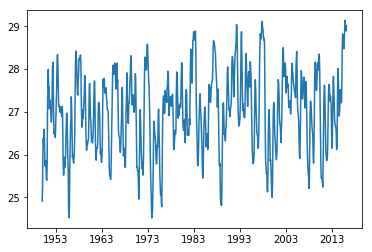

In [13]:
nino34_series.plot()

We could also reindex the original data frame so that it uses the new nino34_dates

In [16]:
data_file['Dates']=nino34_dates # Add a new column with the Dates data

In [17]:
data_file.set_index('Dates') # Set the index using one of the columns

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
Dates,,,,,,,,,,
1950-01-15,1950,1,23.30,-1.41,23.84,-1.96,27.18,-1.17,24.91,-1.80
1950-02-15,1950,2,24.33,-1.85,25.06,-1.49,26.83,-1.37,25.26,-1.62
1950-03-15,1950,3,25.24,-1.33,26.53,-0.76,26.91,-1.41,26.08,-1.28
1950-04-15,1950,4,23.88,-1.80,26.64,-0.97,27.42,-1.16,26.38,-1.46
1950-05-15,1950,5,22.91,-1.56,25.87,-1.42,27.95,-0.94,26.25,-1.71
1950-06-15,1950,6,21.60,-1.55,25.63,-1.00,28.27,-0.62,26.59,-1.14
1950-07-15,1950,7,20.58,-1.47,25.01,-0.80,27.84,-1.00,26.40,-0.91
1950-08-15,1950,8,20.29,-0.82,24.52,-0.71,27.54,-1.23,25.90,-1.06
1950-09-15,1950,9,19.67,-1.19,24.17,-0.90,27.44,-1.34,25.73,-1.14


### Quick plots

For a quick look, you can directly plot out the date into one plot

(20, 30)

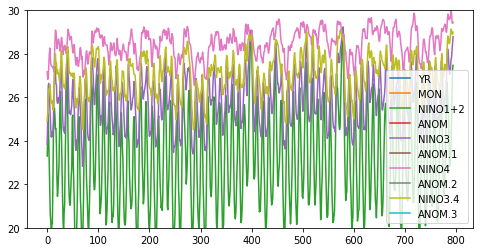

In [25]:
plt.figure()
ax=data_file.plot(figsize=(8,4),use_index=True)
plt.ylim((20,30))

Text(0.5,1,'Scatter between Nino3 and Nino3.4')

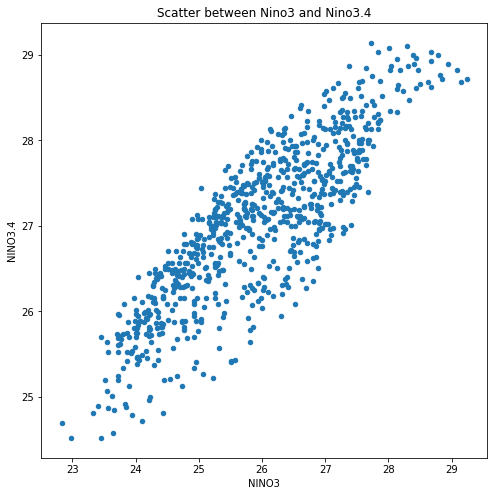

In [30]:
plt.figure()
data_file.plot.scatter('NINO3','NINO3.4',figsize=(8,8))
plt.title('Scatter between Nino3 and Nino3.4')

## Plot precip data